# AdaBoost Classification on Breast Cancer Dataset
This notebook demonstrates how to use scikit-learn’s `AdaBoostClassifier` for binary classification.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
sns.set_theme()

## Data Loading & Exploration
Load the breast cancer dataset and inspect its shape and class distribution.

In [4]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')  # 0 = malignant, 1 = benign
print(f"Feature matrix shape: {X.shape}")

Feature matrix shape: (569, 30)


In [5]:
print("Class distribution:\n", y.value_counts())

Class distribution:
 target
1    357
0    212
Name: count, dtype: int64


In [6]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y.describe()

count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

## Exploratory Visualization
Plot two features (`mean radius` vs `mean texture`) colored by class.

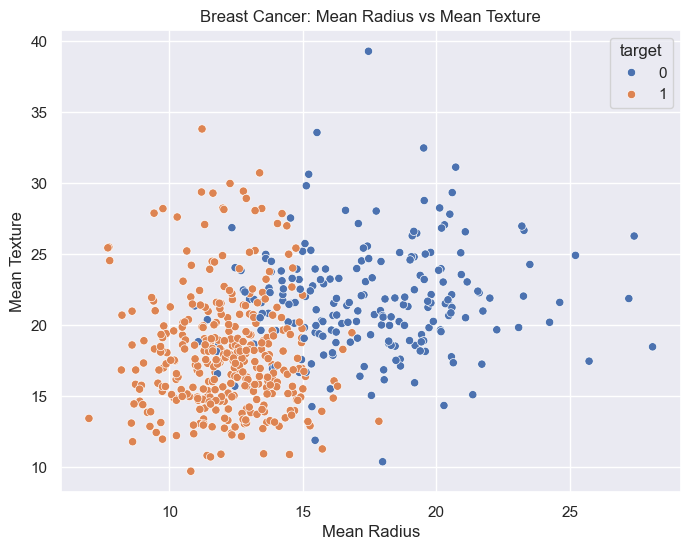

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X['mean radius'], y=X['mean texture'], hue=y, palette='deep')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Breast Cancer: Mean Radius vs Mean Texture')
plt.show()

## Train/Test Split
Split data into 80% train and 20% test sets, stratifying on the label.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

Training samples: 455, Test samples: 114
